In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, auc, roc_curve

import warnings
warnings.filterwarnings("ignore")

# EDA

# Loading the data.

In this homework, we will use Credit Card Data from book "Econometric Analysis".

In [2]:
df = pd.read_csv('AER_credit_card_data.csv')
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
card,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no,yes,no
reports,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,3
age,37.66667,33.25,33.66667,30.5,32.16667,23.25,27.91667,29.16667,37.0,28.41667,30.5,42.0,30.0,28.83333,35.33333,41.16667,40.08333,29.5,39.5,45.75
income,4.52,2.42,4.5,2.54,9.7867,2.5,3.96,2.37,3.8,3.2,3.95,1.98,1.73,2.45,1.908,3.2,4.0,3.0,9.9999,3.4
share,0.03327,0.005217,0.004156,0.065214,0.067051,0.044438,0.012576,0.076434,0.245628,0.01978,0.078025,0.000606,0.000694,0.038796,0.026907,0.125819,0.074816,0.0004,0.065795,0.000353
expenditure,124.9833,9.854167,15.0,137.8692,546.5033,91.99667,40.83333,150.79,777.8217,52.58,256.6642,0.0,0.0,78.87417,42.615,335.435,248.7192,0.0,548.035,0.0
owner,yes,no,yes,no,yes,no,no,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,no
selfemp,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no
dependents,3,3,4,0,2,0,2,0,0,0,1,2,1,0,2,1,2,2,0,0
months,54,34,58,25,64,54,7,77,97,65,24,36,42,26,120,168,96,60,28,28


### Content
- card: Dummy variable, 1 if application for credit card accepted, 0 if not
- reports: Number of major derogatory reports
- age: Age n years plus twelfths of a year
- income: Yearly income (divided by 10,000)
- share: Ratio of monthly credit card expenditure to yearly income
- expenditure: Average monthly credit card expenditure
- owner: 1 if owns their home, 0 if rent
- selfempl: 1 if self employed, 0 if not.
- dependents: 1 + number of dependents
- months: Months living at current address
- majorcards: Number of major credit cards held
- active: Number of active credit accounts

In [3]:
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [4]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
card,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
reports,0,0,0,0,0,0,0,0,0,0
age,37.66667,33.25,33.66667,30.5,32.16667,23.25,27.91667,29.16667,37.0,28.41667
income,4.52,2.42,4.5,2.54,9.7867,2.5,3.96,2.37,3.8,3.2
share,0.03327,0.005217,0.004156,0.065214,0.067051,0.044438,0.012576,0.076434,0.245628,0.01978
expenditure,124.9833,9.854167,15.0,137.8692,546.5033,91.99667,40.83333,150.79,777.8217,52.58
owner,yes,no,yes,no,yes,no,no,yes,yes,no
selfemp,no,no,no,no,no,no,no,no,no,no
dependents,3,3,4,0,2,0,2,0,0,0
months,54,34,58,25,64,54,7,77,97,65


Create the target variable by mapping yes to 1 and no to 0.


In [6]:
# convert churn column into integer column
df.card = (df.card == 'yes').astype(int)
df.card.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: card, dtype: int32

Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

In [7]:
full_train, X_test = train_test_split(df, test_size=0.2, random_state=1)
X_train, X_val = train_test_split(full_train, test_size=0.25, random_state=1)


X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)


y_train = X_train.card.values
y_test = X_test.card.values
y_val = X_val.card.values


X_train.drop(['card'],  inplace=True, axis=1)
X_val.drop(['card'],  inplace=True, axis=1)
X_test.drop(['card'],  inplace=True, axis=1)

In [8]:
# calculate card rate
full_train.card.value_counts(normalize=True)

1    0.781991
0    0.218009
Name: card, dtype: float64

In [9]:
len(y_val)

264

# Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the card variable.
- Use the training dataset for that.
- If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

In [10]:
dv = DictVectorizer(sparse=False)

In [11]:
columns = ["reports",
            "share",
            "dependents", 
            "active"]

Feature: reports >>>> ROC AUC Score 0.6593376764386536
Feature: share >>>> ROC AUC Score 0.5
Feature: dependents >>>> ROC AUC Score 0.5
Feature: active >>>> ROC AUC Score 0.5


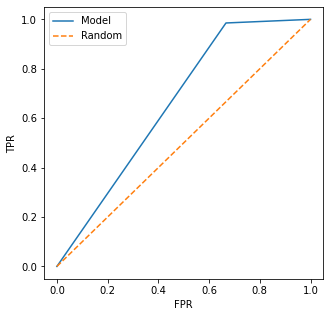

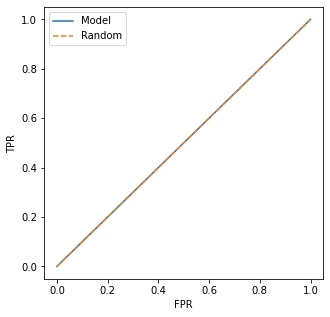

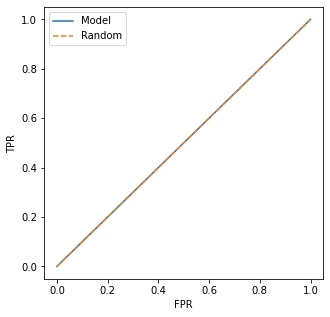

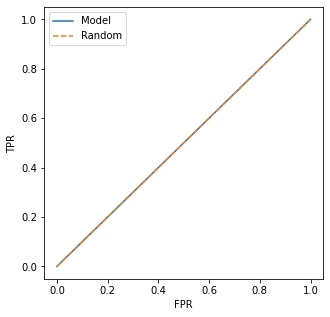

In [12]:
for column in columns:
    X_train_ =pd.DataFrame(X_train[column])
    train_dict = X_train_.to_dict(orient='records')
    x_train = dv.fit_transform(train_dict)

    model = LogisticRegression()
    model.fit(x_train, y_train)
    
    y_pred_t = model.predict(x_train)
    
    print('Feature: ' +column, '>>>> ROC AUC Score', roc_auc_score(y_train, y_pred_t))
    
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_t)
    
    plt.figure(figsize=(5, 5))

    plt.plot(fpr, tpr, label='Model')
    plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')

    plt.legend()

# Training the model
From now on, use these columns only:

In [13]:
numerical =["reports",
            "age",
            "income",
            "share",
            "expenditure",
            "dependents", 
            "months",
            "majorcards",
            "active"]

In [14]:
categorical  = ["owner", 
                "selfemp"]

In [15]:
X_train_ =pd.DataFrame(X_train[numerical + categorical])
train_dict = X_train_.to_dict(orient='records')
x_train = dv.fit_transform(train_dict)

X_val_ =pd.DataFrame(X_val[numerical + categorical])
val_dict = X_val_.to_dict(orient='records')
x_val = dv.fit_transform(val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

# Question 2
What's the AUC of this model on the validation dataset? (round to 3 digits)

In [16]:
y_pred_v = model.predict_proba(x_val)[:,1]
card_acc = (y_pred_v > 0.5)
(y_val == card_acc).mean()

0.9696969696969697

In [17]:
print('%0.3f'% roc_auc_score(y_val, y_pred_v))

0.995


In [18]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_v)
auc = auc(fpr, tpr)
print('%0.3f'% (auc))

0.995


# Question 3
Now let's compute precision and recall for our model.

- Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

In [19]:
thresholds = np.linspace(0,1,101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

# Precision: Fraction of positive predictions that are correct
 tp / (tp + fp)

# Recall: Fraction of correctly identified positive examples
tp / (tp + fn) = tp / (#positive observations)

In [20]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))
        
    columns =["threshold", "tp", "fp", "fn", "tn"]
    df_scores = pd.DataFrame(scores, columns=columns)
        
    df_scores["tpr"] = df_scores.tp/(df_scores.tp + df_scores.fn)#Recall
    df_scores["fpr"] = df_scores.fp/(df_scores.fp + df_scores.tn)#Recall
    
    df_scores["tpp"] = df_scores.tp/(df_scores.tp + df_scores.fp)#Precision
    df_scores["fpp"] = df_scores.fp/(df_scores.fp + df_scores.tp)#Precision
    r = df_scores['tpr']
    p = df_scores['tpp']
    df_scores["f1"] = 2 * ((p*r)/(p+r))
    
    return df_scores

In [21]:
df_scores = tpr_fpr_dataframe(y_val, y_pred_v)

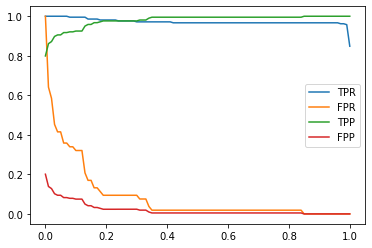

In [22]:
plt.plot(df_scores["threshold"], df_scores["tpr"], label="TPR")
plt.plot(df_scores["threshold"], df_scores["fpr"], label="FPR")
plt.plot(df_scores["threshold"], df_scores["tpp"], label="TPP")
plt.plot(df_scores["threshold"], df_scores["fpp"], label="FPP")
plt.legend();

# Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both 

F1 = 2 * {P * R} / {P + R}

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

In [23]:
df_scoresF1 = tpr_fpr_dataframe(y_val, y_pred_v)

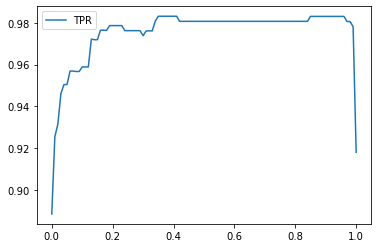

In [24]:
plt.plot(df_scoresF1["threshold"], df_scoresF1["f1"] , label="TPR")

plt.legend();

In [25]:
r = df_scores['tpr']
p = df_scores['tpp']

In [26]:
f1 = 2 * ((p*r)/(p+r))
f1 = pd.DataFrame(f1)
f1.head(10)

,0
0,0.888421
1,0.925439
2,0.931567
3,0.946188
4,0.950450
5,0.950450
6,0.956916
7,0.956916
8,0.956720
9,0.956720


# Question 5


In [45]:
kFold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kFold.split(full_train):
    df_train = full_train.iloc[train_idx]
    df_val = full_train.iloc[val_idx]

    X_train_ =pd.DataFrame(df_train[numerical + categorical])
    train_dict = df_train.to_dict(orient='records')
    x_train = dv.fit_transform(train_dict)

    X_val_ =pd.DataFrame(df_val[numerical + categorical])
    val_dict = df_val.to_dict(orient='records')
    x_val = dv.fit_transform(val_dict)
    
    y_train = df_train.card.values
    y_val = df_val.card.values
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(x_train, y_train)    
    
    y_pred = model.predict(x_val)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

std_folds = np.std(scores)
print(std_folds)

0.002499999999999991


# Question 5


In [48]:
C = [0.01, 0.1, 1, 10]
fold_stats = pd.DataFrame()

for c in [0.01, 0.1, 1, 10]:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []
    for train_idx, val_idx in kfold.split(full_train):
        df_train = full_train.iloc[train_idx]
        df_val = full_train.iloc[val_idx]

        X_train_ =pd.DataFrame(df_train[numerical + categorical])
        train_dict = df_train.to_dict(orient='records')
        x_train = dv.fit_transform(train_dict)

        X_val_ =pd.DataFrame(df_val[numerical + categorical])
        val_dict = df_val.to_dict(orient='records')
        x_val = dv.fit_transform(val_dict)

        y_train = df_train.card.values
        y_val = df_val.card.values

        model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
        model.fit(x_train, y_train)    

        y_pred = model.predict(x_val)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    data = pd.DataFrame([{'param': c, 'mean': np.mean(scores).round(3), 'sd': np.std(scores).round(3)}])
    fold_stats = pd.concat([fold_stats, data])

print(fold_stats)  # The best c is the default value 1

   param   mean     sd
0   0.01  0.987  0.007
0   0.10  0.988  0.007
0   1.00  0.999  0.002
0  10.00  1.000  0.000
